In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("mutual_corr.csv")
df_month

,May_4,May,April_4,February_2,October_3,June_3,April_7,November_4,March_5,September,...,July,August,March_11,April_2,May_9,June,June_2,February,August_5,March_4
0,-0.152688,-0.537932,-0.510503,-0.237025,-0.238237,-0.205749,-0.189229,0.333426,0.397997,-0.415283,...,-0.583706,-0.869912,1.079518,0.085459,-0.436639,-0.218636,-0.436715,-0.751789,0.196367,-0.448139
1,-0.434277,0.143875,-0.239307,0.043112,-0.238237,-0.205749,0.247035,0.333426,0.526023,-0.415283,...,-0.583706,-0.869912,1.156288,0.229490,-0.405611,-0.218636,-0.436715,-0.365346,0.196367,-0.352964
2,-0.491836,0.062558,-0.490269,-0.154323,0.024234,-0.292525,0.627872,0.408272,-0.150481,-0.234289,...,-0.578803,-0.542936,0.918138,0.118633,0.146214,-0.044665,-0.338067,-0.898243,-0.293017,-0.421948
3,-0.425002,0.105073,-0.429062,-0.405000,-0.292296,0.042753,0.339229,0.118782,0.263036,-0.437319,...,-0.248183,-0.408126,0.534954,0.420907,-0.236541,-0.123434,-0.538552,-0.497185,0.155195,-0.138223
4,-0.100197,0.519645,-0.327994,-0.286091,0.120234,-0.230356,0.330392,0.639984,-0.310883,-0.418323,...,-0.571115,-0.375528,0.724296,-0.049493,-0.312205,0.572483,-0.783888,-0.584100,-0.173621,-0.538699
5,-0.586050,0.048646,-0.711481,0.185905,-0.485025,-0.369829,0.224681,0.124384,0.533722,-0.447553,...,-0.100775,-0.293688,0.830958,-0.195406,0.160410,0.071797,-0.336166,-0.980613,-0.186848,-0.259739
6,0.041170,-0.185863,-0.023152,-0.453909,0.061113,-0.127429,-0.024626,0.832906,0.181897,-0.288791,...,-0.270540,-0.241972,1.027510,0.344380,-0.080007,0.166025,-0.609995,-0.772201,-0.478039,-0.189656
7,0.383246,0.043587,-0.588995,-0.055208,0.123322,-0.433658,0.229444,0.308817,0.130283,-0.293657,...,-0.138093,-0.393390,-0.257120,0.010624,-0.418659,0.615416,0.244009,-0.428767,-0.126700,-0.613182
8,-0.137203,-0.076139,-0.479884,-0.270388,0.126905,-0.004318,0.167753,-0.061509,0.552124,-0.241512,...,-0.383503,-0.113330,0.696500,0.443440,0.098377,0.057047,-0.393742,-0.463899,-0.214539,-0.578975
9,-0.396746,0.306609,-0.374410,-0.195264,-0.310501,-0.324068,-0.003505,0.245495,-0.114913,-0.109211,...,-0.337750,-0.443555,0.276037,-0.212123,-0.436770,-0.057090,-0.169690,-0.434069,0.123873,-0.331081


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.20652268, -1.10387076,  0.12864241,  0.51854678, -0.75489103,
        -0.63275815, -1.43348109, -0.17593393,  0.80774011, -0.83427623],
       [-1.46822054,  0.97838257,  1.371719  ,  1.29229509, -0.75489103,
        -0.63275815, -0.19284749, -0.17593393,  1.18967678, -0.83427623],
       [-1.72612303,  0.73003795,  0.22138602,  0.74697206,  0.10799359,
        -1.11095444,  0.89016408,  0.0769891 , -0.82852088,  0.14742945],
       [-1.42666111,  0.85988011,  0.50194122,  0.05459039, -0.93261406,
         0.7366609 ,  0.06933057, -0.90126655,  0.40511479, -0.95380137],
       [ 0.02867103,  2.1259924 ,  0.96520483,  0.38302375,  0.42359665,
        -0.76835866,  0.04420218,  0.85999944, -1.30704333, -0.85076686],
       [-2.14826254,  0.68755137, -0.79257871,  1.68669713, -1.5662203 ,
        -1.53695288, -0.25641672, -0.88233309,  1.21264528, -1.00930815],
       [ 0.66208415, -0.02864435,  2.36250863, -0.08049666,  0.22923289,
        -0.20115822, -0.96538648,  1.51192797

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 2.50077554, -1.35813348, -0.09530993, -1.189308  ,  1.89602607,
        -1.95123443, -0.57437211,  2.00379002, -1.41656375, -0.44774127],
       [-0.09689622, -0.89966   ,  1.1233477 , -0.90480286, -0.69541265,
        -0.67862256, -1.37911077, -0.60286642, -0.36445283,  1.54030203],
       [ 0.93260979, -0.70694143,  0.39592217,  0.80126121,  1.74755175,
         0.30069846, -1.18631954,  0.76075986,  0.74467782,  1.13010551],
       [ 0.07894492,  0.46367304, -0.47062222, -0.73137776, -0.48263755,
        -0.10317363,  0.19372977, -1.07452773, -0.32974231, -0.56288278],
       [ 0.95755143,  0.52123254, -0.69500983, -0.19679689,  0.11877175,
        -1.16792534, -0.45193014,  1.09202093,  1.15914542,  0.41266494],
       [-0.74468393,  0.52661845, -1.97075278, -0.44829552,  0.15779418,
         2.17824012,  1.7150716 , -0.86341485, -0.71306417, -0.16489285],
       [-0.61529192, -1.36929575, -0.27185182,  1.31203919, -0.23069379,
         0.62451126,  0.31669008, -1.60729929

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 10}
Best Score: -0.07128097947031825
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 5}
Best Score: 0.038013465098330035
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 5}
Best Score: 0.10824682729361285
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 10}
Best Score: 0.005840112144947229
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 9}
Best Score: -0.20651302428595808


In [13]:
y_pred_list

[array([-0.30776867,  0.14155449,  0.13680697, -0.01486136,  0.06680975,
        -0.08132803, -0.32071478, -0.29451108, -0.08132803,  0.22775172,
        -0.15344163, -0.01486136, -0.30302114,  0.07268754, -0.01486136,
         0.0583622 ]),
 array([-0.27267692, -0.067     ,  0.50913333,  0.04756197,  0.39275   ,
        -0.17815   ,  0.27633889, -0.26174359, -0.01188089,  0.82275   ,
        -0.14066667, -0.42132692,  0.04168889,  0.28363889,  0.35008889,
         0.3244    ]),
 array([-0.57126667,  0.422     ,  0.41613158,  0.27096188,  0.74929697,
        -0.20443333, -0.976     , -0.19135   ,  0.1149303 ,  0.85529697,
        -0.10078509,  0.11699825, -0.4347    ,  0.50746491,  0.34212855,
        -0.354     ]),
 array([-0.21412502,  0.16738042,  0.17386943, -0.0674712 ,  0.11389165,
        -0.13464898, -0.39548787, -0.28654381, -0.13464898,  0.28789727,
        -0.14666312, -0.0674712 , -0.22955543,  0.09846123, -0.0674712 ,
         0.08703616]),
 array([-0.28514111,  0.01883442

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.1460787032763967,
 -0.029880604473716488,
 0.2057049857035054,
 -0.067944148468354,
 0.34519750099262203]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/kendall/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/kendall/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/kendall/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'AT+hgt Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/kendall/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 10}
Best Score: -0.07128097947031825
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 5}
Best Score: 0.038013465098330035
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 5}
Best Score: 0.10824682729361285
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 10}
Best Score: 0.005840112144947229
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 9}
Best Score: -0.20651302428595808


In [21]:
y_pred_list_rf

[array([-0.30776867,  0.14155449,  0.13680697, -0.01486136,  0.06680975,
        -0.08132803, -0.32071478, -0.29451108, -0.08132803,  0.22775172,
        -0.15344163, -0.01486136, -0.30302114,  0.07268754, -0.01486136,
         0.0583622 ]),
 array([-0.27267692, -0.067     ,  0.50913333,  0.04756197,  0.39275   ,
        -0.17815   ,  0.27633889, -0.26174359, -0.01188089,  0.82275   ,
        -0.14066667, -0.42132692,  0.04168889,  0.28363889,  0.35008889,
         0.3244    ]),
 array([-0.57126667,  0.422     ,  0.41613158,  0.27096188,  0.74929697,
        -0.20443333, -0.976     , -0.19135   ,  0.1149303 ,  0.85529697,
        -0.10078509,  0.11699825, -0.4347    ,  0.50746491,  0.34212855,
        -0.354     ]),
 array([-0.21412502,  0.16738042,  0.17386943, -0.0674712 ,  0.11389165,
        -0.13464898, -0.39548787, -0.28654381, -0.13464898,  0.28789727,
        -0.14666312, -0.0674712 , -0.22955543,  0.09846123, -0.0674712 ,
         0.08703616]),
 array([-0.28514111,  0.01883442

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.1460787032763967,
 -0.029880604473716488,
 0.2057049857035054,
 -0.067944148468354,
 0.34519750099262203]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/kendall/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook
    
print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/kendall/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/kendall/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'AT+hgt Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/kendall/comparison plots/randomforest


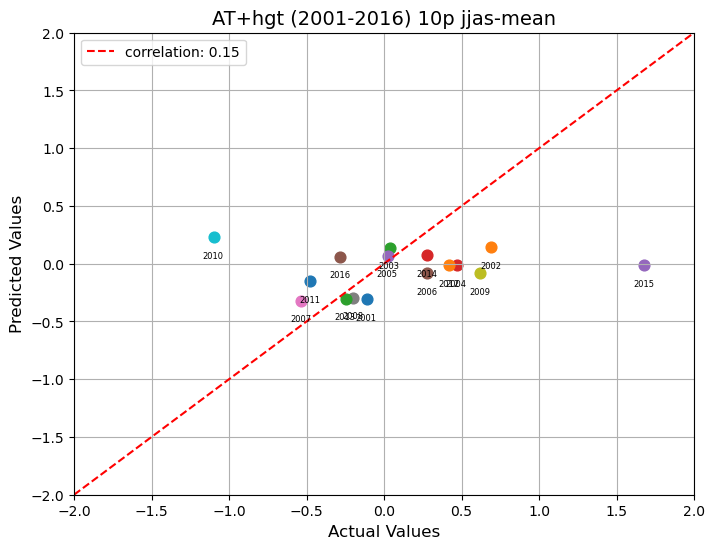

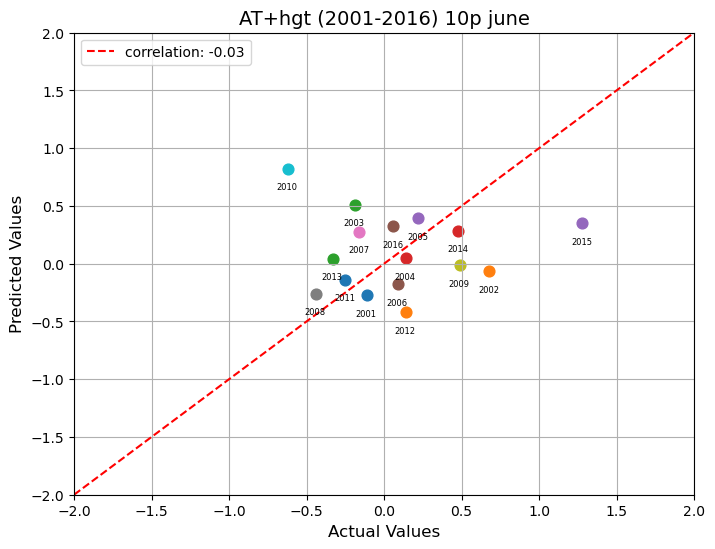

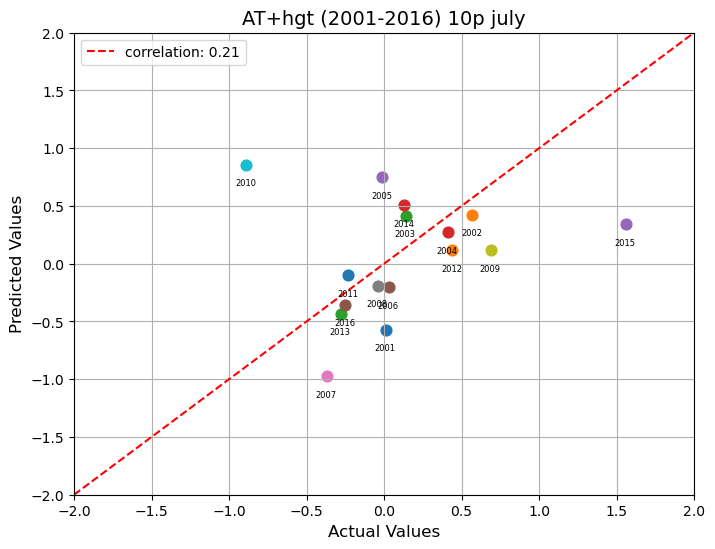

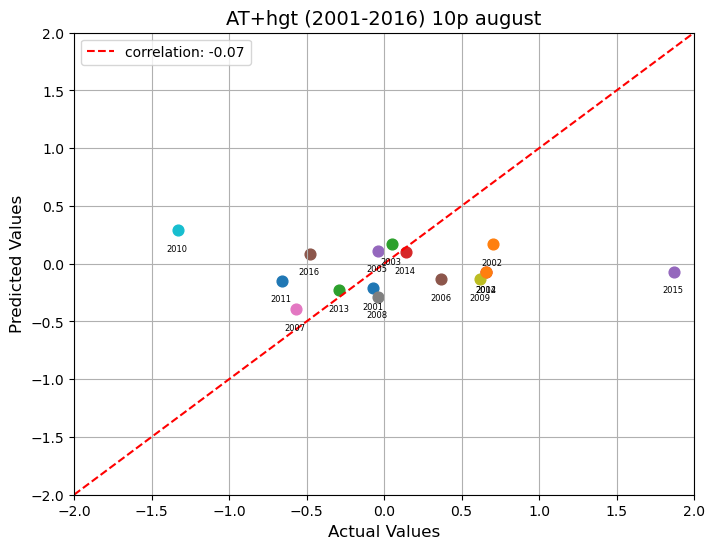

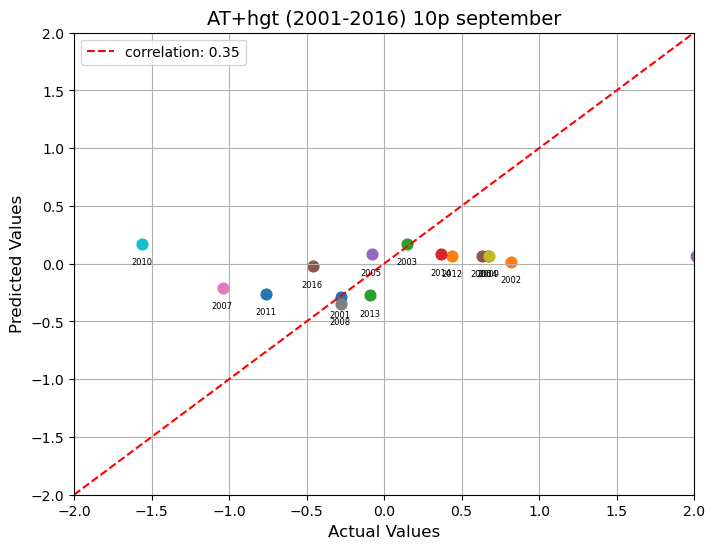

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show